Global Best Position: [0.99995006 0.9999091 ]
Global Best Score: 1.0563085284080207e-08


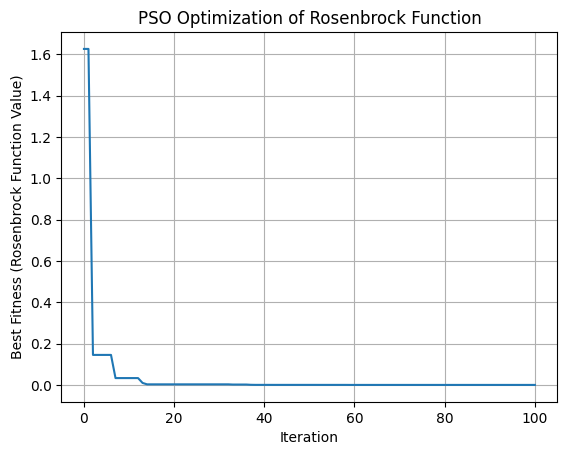

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# 定义 Rosenbrock 目标函数
def rosenbrock(position):
    x, y = position
    return (1 - x)**2 + 100 * (y - x**2)**2


# PSO 参数设置
NUM_PARTICLES = 30          # 粒子数量
DIMENSIONS = 2              # 维度（x 和 y）
ITERATIONS = 100            # 最大迭代次数

# 学习因子和惯性权重
W = 0.7                     # 惯性权重
C1 = 1.5                    # 个体学习因子
C2 = 1.5                    # 社会学习因子

# 粒子位置和速度的范围
X_MIN, X_MAX = -5, 5
V_MIN, V_MAX = -1, 1


# 初始化粒子的位置和速度
positions = np.random.uniform(low=X_MIN, high=X_MAX, size=(NUM_PARTICLES, DIMENSIONS))
velocities = np.random.uniform(low=V_MIN, high=V_MAX, size=(NUM_PARTICLES, DIMENSIONS))

# 初始化个体最优位置和全局最优位置
p_best_positions = positions.copy()
p_best_scores = np.apply_along_axis(rosenbrock, 1, positions)
'''
np.apply_along_axis(func, axis, arr, *args, **kwargs)
func：需要应用的函数（这里是 rosenbrock）。
axis：指定应用函数的轴，axis=1 表示按行处理。
arr：输入的数组（这里是 positions）。
*args, **kwargs：传递给 func 的额外参数（此例未使用）。
'''


g_best_position = p_best_positions[np.argmin(p_best_scores)] #用argmin找到p_best_scores的索引，再用此索引从p_best_positions输出需要的g_best_position
g_best_score = np.min(p_best_scores)

# 存储每代最优解以便可视化
best_scores_over_time = [g_best_score]


# PSO 主循环
for iteration in range(ITERATIONS):
    # 更新粒子速度和位置
    for i in range(NUM_PARTICLES):
        r1, r2 = np.random.rand(), np.random.rand()
        
        # 更新速度
        velocities[i] = (
            W * velocities[i] +
            C1 * r1 * (p_best_positions[i] - positions[i]) +
            C2 * r2 * (g_best_position - positions[i])
        )
        
        # 限制速度范围
        velocities[i] = np.clip(velocities[i], V_MIN, V_MAX)
        
        # 更新位置
        positions[i] += velocities[i]
        positions[i] = np.clip(positions[i], X_MIN, X_MAX)
        
        # 计算新位置的适应度
        score = rosenbrock(positions[i])
        
        # 更新个体最优
        if score < p_best_scores[i]:
            p_best_scores[i] = score
            p_best_positions[i] = positions[i]
        
        # 更新全局最优
        if score < g_best_score:
            g_best_score = score
            g_best_position = positions[i]
    
    # 记录每代的最优适应度
    best_scores_over_time.append(g_best_score)

# 输出最终最优解
print(f"Global Best Position: {g_best_position}")
print(f"Global Best Score: {g_best_score}")


# 绘制适应度随迭代次数的变化
plt.plot(best_scores_over_time)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness (Rosenbrock Function Value)')
plt.title('PSO Optimization of Rosenbrock Function')
plt.grid(True)
plt.show()
